The first step is to import numpy (a scientific programming package) and random, a package that helps develop random data 

In [1]:
from pathlib import Path
import json
import pandas as pd
import re
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

The two states in our model are 1) a hot streak state, and 2) a cold streak state 

In [2]:
states = ["cold_streak", "hot_streak"]

Wetzel does not have a set transition probability. Hence our $\alpha$, representing the transition probability will be a free variable. We can set it to be anything but will just choose 0.4.

In [3]:
alpha = 0.4 

In [4]:
transition_matrix = [[alpha, 1 - alpha], [1 - alpha, alpha]]

In [5]:
transition_name = [['CC', 'CH'], ['HC', 'HH']]

In [6]:
def state_forcast(shots):
    
    # the starting state of the model: hot 
    # random = np.random.randint(0, 1 + 1)
    curr_state = "hot_streak"
    
    # lets store the different states we end up in and intermediate probs
    state_list = [curr_state]
    probability_sequence = [1]
    
    prob = 1
    i = 0
    while i != shots:
        if curr_state == "cold_streak":
            change = np.random.choice(transition_name[0],replace=True,p=transition_matrix[0])
            if change == 'CC':
                prob = prob * alpha
                probability_sequence.append(prob)
                state_list.append(curr_state)
                pass
            else:
                prob = prob * (1 - alpha)
                probability_sequence.append(prob)
                curr_state = "hot_streak"
                state_list.append(curr_state)
        elif curr_state == "hot_streak":
            change = np.random.choice(transition_name[1],replace=True,p=transition_matrix[1])
            if change == "HH":
                prob = prob * alpha
                probability_sequence.append(prob)
                state_list.append(curr_state)
                pass
            else:
                prob = prob * (1 - alpha)
                probability_sequence.append(prob)
                curr_state = "cold_streak"
                state_list.append(curr_state)
        i += 1  
        
    print("Possible states: " + str(state_list))
    print("End state after "+ str(shots) + " shots: " + state_list[len(state_list)-1])
    print("Intermediate probabilites: " + str(probability_sequence))
    print("Probability of the possible sequence of states: " + str(prob))

    
    return state_list

In [7]:
state_list = []
count = 0

for iterations in range(1,5):
    state_list.append(state_forcast(10))

for smaller_list in state_list:
    if(smaller_list[9] == "hot_streak"):
        count += 1

percentage = (count/10000) * 100
print("The probability of starting in a hot_streak and ending in a hot_streak "+ str(percentage) + " %")

Possible states: ['hot_streak', 'cold_streak', 'cold_streak', 'hot_streak', 'hot_streak', 'cold_streak', 'hot_streak', 'hot_streak', 'hot_streak', 'cold_streak', 'cold_streak']
End state after 10 shots: cold_streak
Intermediate probabilites: [1, 0.6, 0.24, 0.144, 0.0576, 0.03456, 0.020736, 0.0082944, 0.0033177600000000003, 0.001990656, 0.0007962624]
Probability of the possible sequence of states: 0.0007962624
Possible states: ['hot_streak', 'hot_streak', 'cold_streak', 'hot_streak', 'cold_streak', 'hot_streak', 'cold_streak', 'cold_streak', 'cold_streak', 'hot_streak', 'cold_streak']
End state after 10 shots: cold_streak
Intermediate probabilites: [1, 0.4, 0.24, 0.144, 0.08639999999999999, 0.05183999999999999, 0.031103999999999993, 0.012441599999999997, 0.004976639999999999, 0.0029859839999999993, 0.0017915903999999995]
Probability of the possible sequence of states: 0.0017915903999999995
Possible states: ['hot_streak', 'cold_streak', 'hot_streak', 'cold_streak', 'hot_streak', 'hot_str

In [8]:
def game_json_to_game_df(json_filename):
    with open(json_filename) as f:
        data = json.load(f)
    gameData = pd.DataFrame()
    gameData['player'] = data.keys()
    shots = []
    for i in data.values():
        made = ""
        for j in i:
            made+=(str(j))
        shots.append(made)
    gameData['shots'] = shots
    gameData['game'] = '.json'
    return gameData

In [9]:
def dict_to_df(data):
    gameData = pd.DataFrame()
    gameData['player'] = data.keys()
    shots = []
    for i in data.values():
        made = ""
        for j in i:
            made+=(str(j))
        shots.append(made)
    gameData['shots'] = shots
    gameData['game'] = '.json'
    return gameData
    
    
james_data_dict = {'L. James1': [1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1], 'L. James2': [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0], 'L. James3': [1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0], 'L. James4': [1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0], 'L. James5': [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1], 'L. James6': [0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], 'L. James7': [0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0], 'L. James8': [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], 'L. James9': [1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0], 'L. James10': [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0], 'L. James11': [0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1], 'L. James12': [1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0], 'L. James13': [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1], 'L. James14': [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0], 'L. James15': [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1], 'L. James16': [0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], 'L. James17': [0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 'L. James18': [0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1], 'L. James19': [1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], 'L. James20': [1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1], 'L. James21': [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1], 'L. James22': [0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0], 'L. James23': [1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0], 'L. James24': [1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0], 'L. James25': [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1], 'L. James26': [0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0], 'L. James27': [0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], 'L. James28': [1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0], 'L. James29': [1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1], 'L. James30': [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1], 'L. James31': [1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0], 'L. James32': [0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0], 'L. James33': [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1], 'L. James34': [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0], 'L. James35': [1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1], 'L. James36': [0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0], 'L. James37': [1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1], 'L. James38': [1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0], 'L. James39': [0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], 'L. James40': [1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0], 'L. James41': [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0], 'L. James42': [1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0], 'L. James43': [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], 'L. James44': [1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1], 'L. James45': [0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0], 'L. James46': [0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1], 'L. James47': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1], 'L. James48': [1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0], 'L. James49': [0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1], 'L. James50': [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1], 'L. James51': [1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0], 'L. James52': [0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0], 'L. James53': [1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1], 'L. James54': [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0], 'L. James55': [0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0], 'L. James56': [0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0], 'L. James57': [1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0], 'L. James58': [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0], 'L. James59': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0], 'L. James60': [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1], 'L. James61': [1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0], 'L. James62': [0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1], 'L. James63': [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1], 'L. James64': [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], 'L. James65': [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1], 'L. James66': [1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0], 'L. James67': [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0], 'L. James68': [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1], 'L. James69': [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], 'L. James70': [1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0], 'L. James71': [1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0], 'L. James72': [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1], 'L. James73': [1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1], 'L. James74': [0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1], 'L. James75': [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1], 'L. James76': [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0], 'L. James77': [0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1], 'L. James78': [0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1], 'L. James79': [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1], 'L. James80': [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0], 'L. James81': [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1], 'L. James82': [0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0], 'L. James83': [1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1], 'L. James84': [0, 0, 0, 1, 1, 1, 1, 0, 1, 1], 'L. James85': [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1], 'L. James86': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0], 'L. James87': [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1], 'L. James88': [1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0], 'L. James89': [0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0], 'L. James90': [1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0], 'L. James91': [0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0], 'L. James92': [0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], 'L. James93': [1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1], 'L. James94': [1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0], 'L. James95': [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], 'L. James96': [0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0], 'L. James97': [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1], 'L. James98': [1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0], 'L. James99': [1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1], 'L. James100': [1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0], 'L. James101': [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1], 'L. James102': [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1], 'L. James103': [0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1], 'L. James104': [1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], 'L. James105': [1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], 'L. James106': [0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0], 'L. James107': [1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1], 'L. James108': [0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0], 'L. James109': [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1], 'L. James110': [0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1], 'L. James111': [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0], 'L. James112': [1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1], 'L. James113': [0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0], 'L. James114': [1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], 'L. James115': [1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0], 'L. James116': [1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1], 'L. James117': [1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0], 'L. James118': [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0], 'L. James119': [0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], 'L. James120': [1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0], 'L. James121': [1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0], 'L. James122': [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0], 'L. James123': [1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1], 'L. James124': [1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], 'L. James125': [0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0], 'L. James126': [1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0], 'L. James127': [1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1], 'L. James128': [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0], 'L. James129': [0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1], 'L. James130': [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1], 'L. James131': [0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0], 'L. James132': [0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0], 'L. James133': [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0], 'L. James134': [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0], 'L. James135': [0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0], 'L. James136': [0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1], 'L. James137': [0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], 'L. James138': [1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1], 'L. James139': [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], 'L. James140': [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0], 'L. James141': [0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1], 'L. James142': [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0], 'L. James143': [1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0], 'L. James144': [1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0], 'L. James145': [0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0], 'L. James146': [1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1], 'L. James147': [1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1], 'L. James148': [0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0], 'L. James149': [1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1], 'L. James150': [1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0], 'L. James151': [0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1], 'L. James152': [0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1], 'L. James153': [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1], 'L. James154': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1], 'L. James155': [1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0], 'L. James156': [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1], 'L. James157': [1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0], 'L. James158': [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0], 'L. James159': [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0], 'L. James160': [1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0], 'L. James161': [1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0], 'L. James162': [1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1], 'L. James163': [1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0], 'L. James164': [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0], 'L. James165': [0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1], 'L. James166': [1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0], 'L. James167': [1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0], 'L. James168': [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0], 'L. James169': [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0], 'L. James170': [0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0], 'L. James171': [0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1], 'L. James172': [1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0], 'L. James173': [1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1], 'L. James174': [0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0], 'L. James175': [0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0], 'L. James176': [1, 1, 1, 1, 0, 0, 0, 1, 1, 1], 'L. James177': [1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1], 'L. James178': [1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0], 'L. James179': [0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1], 'L. James180': [1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0], 'L. James181': [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0], 'L. James182': [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0], 'L. James183': [0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1], 'L. James184': [1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0], 'L. James185': [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1], 'L. James186': [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], 'L. James187': [1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0], 'L. James188': [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1], 'L. James189': [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1], 'L. James190': [1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1], 'L. James191': [1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0], 'L. James192': [0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1], 'L. James193': [1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1], 'L. James194': [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1], 'L. James195': [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0], 'L. James196': [1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1], 'L. James197': [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1], 'L. James198': [0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1], 'L. James199': [0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0], 'L. James200': [1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1], 'L. James201': [1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1], 'L. James202': [0, 1, 0, 0, 1, 0, 1, 1, 1, 0], 'L. James203': [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0], 'L. James204': [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 'L. James205': [1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1], 'L. James206': [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1], 'L. James207': [0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1], 'L. James208': [1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], 'L. James209': [1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1], 'L. James210': [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1], 'L. James211': [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1], 'L. James212': [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1], 'L. James213': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1], 'L. James214': [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1], 'L. James215': [0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1], 'L. James216': [0, 1, 1, 0, 1, 1, 1, 1, 1, 1], 'L. James217': [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], 'L. James218': [0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1], 'L. James219': [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0], 'L. James220': [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1], 'L. James221': [0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0], 'L. James222': [1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1], 'L. James223': [0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0], 'L. James224': [1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0], 'L. James225': [0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0], 'L. James226': [1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1], 'L. James227': [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1], 'L. James228': [0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0], 'L. James229': [1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1], 'L. James230': [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1], 'L. James231': [0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], 'L. James232': [0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0], 'L. James233': [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1], 'L. James234': [0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0], 'L. James235': [0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0], 'L. James236': [1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0], 'L. James237': [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0], 'L. James238': [1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1], 'L. James239': [0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0], 'L. James240': [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0], 'L. James241': [1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1], 'L. James242': [0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0], 'L. James243': [1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0], 'L. James244': [0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0], 'L. James245': [1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0], 'L. James246': [1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0], 'L. James247': [1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1], 'L. James248': [1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1], 'L. James249': [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1], 'L. James250': [1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0], 'L. James251': [1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1], 'L. James252': [1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1], 'L. James253': [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1], 'L. James254': [0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0], 'L. James255': [0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0], 'L. James256': [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1], 'L. James257': [1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0], 'L. James258': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0], 'L. James259': [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0], 'L. James260': [1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1], 'L. James261': [1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0], 'L. James262': [1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0], 'L. James263': [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 'L. James264': [1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1], 'L. James265': [0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0], 'L. James266': [0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1], 'L. James267': [1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1], 'L. James268': [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1], 'L. James269': [1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1], 'L. James270': [1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1], 'L. James271': [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0], 'L. James272': [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1], 'L. James273': [1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], 'L. James274': [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1], 'L. James275': [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0], 'L. James276': [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1], 'L. James277': [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0], 'L. James278': [1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], 'L. James279': [1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0], 'L. James280': [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0], 'L. James281': [0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1], 'L. James282': [1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1], 'L. James283': [0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1], 'L. James284': [1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0], 'L. James285': [1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1], 'L. James286': [1, 1, 0, 0, 0, 1, 1, 0, 0, 1], 'L. James287': [1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0], 'L. James288': [0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1], 'L. James289': [1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0], 'L. James290': [0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0], 'L. James291': [0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0], 'L. James292': [0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0], 'L. James293': [1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0], 'L. James294': [1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1], 'L. James295': [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1], 'L. James296': [1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0], 'L. James297': [1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], 'L. James298': [0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1], 'L. James299': [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1], 'L. James300': [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0], 'L. James301': [0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1], 'L. James302': [1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1], 'L. James303': [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0], 'L. James304': [1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1], 'L. James305': [0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], 'L. James306': [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1], 'L. James307': [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0], 'L. James308': [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1], 'L. James309': [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0], 'L. James310': [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0], 'L. James311': [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0], 'L. James312': [1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0], 'L. James313': [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0], 'L. James314': [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1], 'L. James315': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0], 'L. James316': [1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1], 'L. James317': [0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0], 'L. James318': [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0], 'L. James319': [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1], 'L. James320': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0], 'L. James321': [0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0], 'L. James322': [1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1], 'L. James323': [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], 'L. James324': [0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0], 'L. James325': [0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1], 'L. James326': [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0], 'L. James327': [1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1], 'L. James328': [1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1], 'L. James329': [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0], 'L. James330': [0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1], 'L. James331': [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0], 'L. James332': [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0], 'L. James333': [1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0], 'L. James334': [1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], 'L. James335': [0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1], 'L. James336': [1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0], 'L. James337': [1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1], 'L. James338': [0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], 'L. James339': [1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1], 'L. James340': [0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0], 'L. James341': [1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], 'L. James342': [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1], 'L. James343': [1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0], 'L. James344': [1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], 'L. James345': [1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0], 'L. James346': [0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1], 'L. James347': [0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1], 'L. James348': [0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1], 'L. James349': [0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1], 'L. James350': [1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1], 'L. James351': [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1], 'L. James352': [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1], 'L. James353': [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1], 'L. James354': [1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0], 'L. James355': [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1], 'L. James356': [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1], 'L. James357': [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1], 'L. James358': [0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], 'L. James359': [0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1], 'L. James360': [1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1], 'L. James361': [1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1], 'L. James362': [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0], 'L. James363': [0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0], 'L. James364': [1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0], 'L. James365': [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0], 'L. James366': [1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1], 'L. James367': [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1], 'L. James368': [0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0], 'L. James369': [1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1], 'L. James370': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0], 'L. James371': [0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1], 'L. James372': [0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1], 'L. James373': [0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0], 'L. James374': [1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1], 'L. James375': [1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1], 'L. James376': [0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1], 'L. James377': [1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1], 'L. James378': [0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1], 'L. James379': [0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0], 'L. James380': [0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1], 'L. James381': [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], 'L. James382': [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0], 'L. James383': [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0], 'L. James384': [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1], 'L. James385': [0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1], 'L. James386': [1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0], 'L. James387': [1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0], 'L. James388': [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1], 'L. James389': [0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0], 'L. James390': [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1], 'L. James391': [0, 1, 1, 1, 1, 0, 0, 0, 0, 0], 'L. James392': [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1], 'L. James393': [1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0], 'L. James394': [0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1], 'L. James395': [1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1], 'L. James396': [0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1], 'L. James397': [1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0], 'L. James398': [0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1], 'L. James399': [1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1], 'L. James400': [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1], 'L. James401': [1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1], 'L. James402': [0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0], 'L. James403': [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1], 'L. James404': [1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1], 'L. James405': [0, 1, 1, 1, 1, 1, 1, 1], 'L. James406': [1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1], 'L. James407': [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1], 'L. James408': [1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 'L. James409': [0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0], 'L. James410': [1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0], 'L. James411': [0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], 'L. James412': [1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1], 'L. James413': [0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1], 'L. James414': [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], 'L. James415': [1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1], 'L. James416': [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0], 'L. James417': [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], 'L. James418': [0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1], 'L. James419': [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1], 'L. James420': [1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1], 'L. James421': [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0], 'L. James422': [1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1], 'L. James423': [0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0], 'L. James424': [1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1], 'L. James425': [0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0], 'L. James426': [1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1], 'L. James427': [0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1], 'L. James428': [1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1], 'L. James429': [1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0], 'L. James430': [0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1], 'L. James431': [0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0], 'L. James432': [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1], 'L. James433': [1, 1, 1, 1, 1, 0, 1, 0, 1], 'L. James434': [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1], 'L. James435': [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], 'L. James436': [1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1], 'L. James437': [0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0], 'L. James438': [1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], 'L. James439': [0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1], 'L. James440': [0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0], 'L. James441': [0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0], 'L. James442': [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], 'L. James443': [0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], 'L. James444': [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1], 'L. James445': [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1], 'L. James446': [0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1], 'L. James447': [1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1], 'L. James448': [0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1], 'L. James449': [0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1], 'L. James450': [0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1], 'L. James451': [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0], 'L. James452': [1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0], 'L. James453': [0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0], 'L. James454': [0, 1, 1, 1, 1, 1, 1, 1, 0, 0], 'L. James455': [0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1], 'L. James456': [1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1], 'L. James457': [0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1], 'L. James458': [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1], 'L. James459': [1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1], 'L. James460': [1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1], 'L. James461': [0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1], 'L. James462': [0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1], 'L. James463': [0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1], 'L. James464': [1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], 'L. James465': [0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0], 'L. James466': [0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1], 'L. James467': [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1], 'L. James468': [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0], 'L. James469': [0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1], 'L. James470': [0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0], 'L. James471': [1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1], 'L. James472': [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0], 'L. James473': [0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0], 'L. James474': [0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], 'L. James475': [0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1], 'L. James476': [1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0], 'L. James477': [0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1], 'L. James478': [1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1], 'L. James479': [1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], 'L. James480': [0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1], 'L. James481': [1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0], 'L. James482': [1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1], 'L. James483': [0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], 'L. James484': [0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1], 'L. James485': [1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1], 'L. James486': [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0], 'L. James487': [1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1], 'L. James488': [0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0], 'L. James489': [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0], 'L. James490': [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1], 'L. James491': [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0], 'L. James492': [1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1], 'L. James493': [0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0], 'L. James494': [1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0], 'L. James495': [1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0], 'L. James496': [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1], 'L. James497': [1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0], 'L. James498': [0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0], 'L. James499': [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0], 'L. James500': [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1], 'L. James501': [0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0], 'L. James502': [0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0], 'L. James503': [0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], 'L. James504': [1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0], 'L. James505': [1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0], 'L. James506': [1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1], 'L. James507': [1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1], 'L. James508': [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0], 'L. James509': [1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1], 'L. James510': [1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1], 'L. James511': [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1], 'L. James512': [1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1], 'L. James513': [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0], 'L. James514': [0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0], 'L. James515': [1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0], 'L. James516': [1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0], 'L. James517': [0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1], 'L. James518': [1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0], 'L. James519': [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1], 'L. James520': [0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0], 'L. James521': [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1], 'L. James522': [1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0], 'L. James523': [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1], 'L. James524': [0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1], 'L. James525': [1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1], 'L. James526': [0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 'L. James527': [0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], 'L. James528': [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0], 'L. James529': [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], 'L. James530': [0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1], 'L. James531': [1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0], 'L. James532': [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], 'L. James533': [1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0], 'L. James534': [0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0], 'L. James535': [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0], 'L. James536': [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], 'L. James537': [1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0], 'L. James538': [1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0], 'L. James539': [1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0], 'L. James540': [1, 0, 0, 1, 1, 0, 0, 1], 'L. James541': [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1], 'L. James542': [1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0], 'L. James543': [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0], 'L. James544': [0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0], 'L. James545': [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0], 'L. James546': [1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0], 'L. James547': [1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1], 'L. James548': [0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], 'L. James549': [1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0], 'L. James550': [0, 1, 0, 1, 0, 0, 1, 0, 0, 0], 'L. James551': [1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0], 'L. James552': [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1], 'L. James553': [0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], 'L. James554': [0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0], 'L. James555': [1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1], 'L. James556': [1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0], 'L. James557': [1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0], 'L. James558': [0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1], 'L. James559': [0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0], 'L. James560': [0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0], 'L. James561': [1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1], 'L. James562': [0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1], 'L. James563': [1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1], 'L. James564': [0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1], 'L. James565': [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0], 'L. James566': [1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0], 'L. James567': [1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1], 'L. James568': [1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0], 'L. James569': [0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0], 'L. James570': [1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0], 'L. James571': [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], 'L. James572': [1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0], 'L. James573': [0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0], 'L. James574': [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], 'L. James575': [1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1], 'L. James576': [1, 0, 1, 0, 1, 0, 0, 1, 0]}
curry_data_dict = {'S. Curry1': [1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0], 'S. Curry2': [1, 0, 1, 1, 0, 1, 1, 1, 1], 'S. Curry3': [0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0], 'S. Curry4': [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0], 'S. Curry5': [1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0], 'S. Curry6': [0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0], 'S. Curry7': [1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0], 'S. Curry8': [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], 'S. Curry9': [0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0], 'S. Curry10': [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0], 'S. Curry11': [0, 0, 1, 1, 0, 0, 1, 1, 0, 1], 'S. Curry12': [1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0], 'S. Curry13': [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0], 'S. Curry14': [0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1], 'S. Curry15': [0, 0, 1, 1, 0, 1, 1, 1, 0, 1], 'S. Curry16': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1], 'S. Curry17': [0, 1, 0, 1, 0, 0, 0, 0, 1, 1], 'S. Curry18': [0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0], 'S. Curry19': [0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0], 'S. Curry20': [0, 0], 'S. Curry21': [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 'S. Curry22': [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0], 'S. Curry23': [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], 'S. Curry24': [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1], 'S. Curry25': [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1], 'S. Curry26': [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0], 'S. Curry27': [1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0], 'S. Curry28': [1, 0, 0, 0, 1, 1, 1], 'S. Curry29': [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'S. Curry30': [1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0], 'S. Curry31': [1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1], 'S. Curry32': [0, 1, 0, 0, 0, 0, 0, 1, 1, 1], 'S. Curry33': [0, 1, 1, 0, 0, 1, 0, 0, 0, 1], 'S. Curry34': [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1], 'S. Curry35': [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0], 'S. Curry36': [1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0], 'S. Curry37': [1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1], 'S. Curry38': [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0], 'S. Curry39': [1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1], 'S. Curry40': [0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0], 'S. Curry41': [0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0], 'S. Curry42': [0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0], 'S. Curry43': [0, 1, 0, 1, 1, 1, 0, 0, 1], 'S. Curry44': [1, 0, 1, 0, 1, 1, 1, 0, 0], 'S. Curry45': [0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0], 'S. Curry46': [1, 1, 1, 1, 1], 'S. Curry47': [0, 0, 0, 0, 0, 0, 1], 'S. Curry48': [0, 1, 1, 1, 1, 1, 0, 0, 1, 1], 'S. Curry49': [1, 0, 0, 0, 0, 1, 0], 'S. Curry50': [0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0], 'S. Curry51': [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0], 'S. Curry52': [0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0], 'S. Curry53': [0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1], 'S. Curry54': [1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0], 'S. Curry55': [0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0], 'S. Curry56': [0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0], 'S. Curry57': [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1], 'S. Curry58': [0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1], 'S. Curry59': [0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0], 'S. Curry60': [1, 0, 1, 1, 1, 0, 0, 0, 0, 0], 'S. Curry61': [1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0], 'S. Curry62': [1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], 'S. Curry63': [0, 1, 0, 0, 0, 1, 1, 0], 'S. Curry64': [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1], 'S. Curry65': [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0], 'S. Curry66': [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], 'S. Curry67': [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0], 'S. Curry68': [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], 'S. Curry69': [1, 0, 0, 1, 0, 0, 0, 1], 'S. Curry70': [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1], 'S. Curry71': [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1], 'S. Curry72': [1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1], 'S. Curry73': [1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1], 'S. Curry74': [0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1], 'S. Curry75': [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], 'S. Curry76': [0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0], 'S. Curry77': [0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1], 'S. Curry78': [1, 0, 0, 1, 1, 0, 0, 1], 'S. Curry79': [1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1], 'S. Curry80': [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0], 'S. Curry81': [1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0], 'S. Curry82': [1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0], 'S. Curry83': [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0], 'S. Curry84': [0, 0, 0, 0, 0, 1, 0], 'S. Curry85': [1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1], 'S. Curry86': [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], 'S. Curry87': [1, 1, 1, 1, 1, 1, 1, 0, 0], 'S. Curry88': [1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], 'S. Curry89': [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1], 'S. Curry90': [0, 1, 0, 1, 1, 0, 0, 0, 0, 0], 'S. Curry91': [0, 1, 1, 1, 0, 0, 0, 0, 0, 0], 'S. Curry92': [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], 'S. Curry93': [0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1], 'S. Curry94': [1, 0, 1, 0, 0, 1], 'S. Curry95': [1, 0, 1, 1, 0, 0, 0], 'S. Curry96': [1, 1, 0, 1, 0, 1, 1], 'S. Curry97': [1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1], 'S. Curry98': [1, 1, 1, 0, 1, 0, 0], 'S. Curry99': [0, 0, 0], 'S. Curry100': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], 'S. Curry101': [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0], 'S. Curry102': [0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1], 'S. Curry103': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0], 'S. Curry104': [1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0], 'S. Curry105': [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0], 'S. Curry106': [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], 'S. Curry107': [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0], 'S. Curry108': [1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], 'S. Curry109': [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1], 'S. Curry110': [0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0], 'S. Curry111': [0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1], 'S. Curry112': [0, 0, 0, 1, 1], 'S. Curry113': [0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], 'S. Curry114': [1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0], 'S. Curry115': [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1], 'S. Curry116': [1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1], 'S. Curry117': [1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1], 'S. Curry118': [1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0], 'S. Curry119': [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0], 'S. Curry120': [0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], 'S. Curry121': [1, 1, 0, 0, 0, 1, 0, 0, 0, 1], 'S. Curry122': [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], 'S. Curry123': [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], 'S. Curry124': [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1], 'S. Curry125': [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0], 'S. Curry126': [1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1], 'S. Curry127': [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0], 'S. Curry128': [1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], 'S. Curry129': [0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0], 'S. Curry130': [1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0], 'S. Curry131': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1], 'S. Curry132': [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1], 'S. Curry133': [0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0], 'S. Curry134': [0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0], 'S. Curry135': [1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0], 'S. Curry136': [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0], 'S. Curry137': [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1], 'S. Curry138': [1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], 'S. Curry139': [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0], 'S. Curry140': [1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1], 'S. Curry141': [0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0], 'S. Curry142': [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0], 'S. Curry143': [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0], 'S. Curry144': [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], 'S. Curry145': [0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1], 'S. Curry146': [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1], 'S. Curry147': [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0], 'S. Curry148': [0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0], 'S. Curry149': [1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1], 'S. Curry150': [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0], 'S. Curry151': [0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], 'S. Curry152': [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1], 'S. Curry153': [0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0], 'S. Curry154': [0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0], 'S. Curry155': [1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0], 'S. Curry156': [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1], 'S. Curry157': [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0], 'S. Curry158': [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], 'S. Curry159': [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], 'S. Curry160': [0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1], 'S. Curry161': [1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1], 'S. Curry162': [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], 'S. Curry163': [0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1], 'S. Curry164': [1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1], 'S. Curry165': [1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1], 'S. Curry166': [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1], 'S. Curry167': [0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], 'S. Curry168': [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1], 'S. Curry169': [1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1], 'S. Curry170': [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1], 'S. Curry171': [1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0], 'S. Curry172': [1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], 'S. Curry173': [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1], 'S. Curry174': [1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0], 'S. Curry175': [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0], 'S. Curry176': [0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0], 'S. Curry177': [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1], 'S. Curry178': [1, 0, 0, 1, 0, 0, 0, 1, 1, 0], 'S. Curry179': [1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1], 'S. Curry180': [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1], 'S. Curry181': [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0], 'S. Curry182': [0, 0, 1, 0, 0, 1, 0, 0], 'S. Curry183': [0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], 'S. Curry184': [1, 0, 0, 1, 1, 1, 0, 1, 1, 1], 'S. Curry185': [1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0], 'S. Curry186': [1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1], 'S. Curry187': [0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1], 'S. Curry188': [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0], 'S. Curry189': [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0], 'S. Curry190': [1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1], 'S. Curry191': [1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0], 'S. Curry192': [0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0], 'S. Curry193': [1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1], 'S. Curry194': [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0], 'S. Curry195': [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1], 'S. Curry196': [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0], 'S. Curry197': [0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1], 'S. Curry198': [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0], 'S. Curry199': [1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1], 'S. Curry200': [1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0], 'S. Curry201': [1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0], 'S. Curry202': [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1], 'S. Curry203': [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], 'S. Curry204': [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0], 'S. Curry205': [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], 'S. Curry206': [1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], 'S. Curry207': [0, 0, 1, 1, 1, 0, 1, 0, 0, 0], 'S. Curry208': [1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1], 'S. Curry209': [1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1], 'S. Curry210': [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0], 'S. Curry211': [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], 'S. Curry212': [1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0], 'S. Curry213': [1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1], 'S. Curry214': [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0], 'S. Curry215': [1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1], 'S. Curry216': [0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0], 'S. Curry217': [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0], 'S. Curry218': [1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0], 'S. Curry219': [0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1], 'S. Curry220': [0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0], 'S. Curry221': [1, 1, 0, 1, 1, 1, 1, 0, 1, 1], 'S. Curry222': [1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0], 'S. Curry223': [1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0], 'S. Curry224': [0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1], 'S. Curry225': [1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0], 'S. Curry226': [1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0], 'S. Curry227': [0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1], 'S. Curry228': [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], 'S. Curry229': [0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1], 'S. Curry230': [1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1], 'S. Curry231': [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], 'S. Curry232': [1, 0, 0, 0, 0, 1, 0, 0, 0, 0], 'S. Curry233': [0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], 'S. Curry234': [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1], 'S. Curry235': [0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0], 'S. Curry236': [1, 0, 1, 1, 0, 0, 1, 1, 0, 1], 'S. Curry237': [1, 1, 1, 0, 1, 0, 0, 1, 0, 0], 'S. Curry238': [0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0], 'S. Curry239': [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1], 'S. Curry240': [0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0], 'S. Curry241': [0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1], 'S. Curry242': [0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0], 'S. Curry243': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], 'S. Curry244': [1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0], 'S. Curry245': [1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], 'S. Curry246': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1], 'S. Curry247': [1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0], 'S. Curry248': [1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1], 'S. Curry249': [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0], 'S. Curry250': [0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0], 'S. Curry251': [1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0], 'S. Curry252': [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0], 'S. Curry253': [1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1], 'S. Curry254': [1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0], 'S. Curry255': [1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1], 'S. Curry256': [1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0], 'S. Curry257': [0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1], 'S. Curry258': [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], 'S. Curry259': [0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1], 'S. Curry260': [1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1], 'S. Curry261': [1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0], 'S. Curry262': [0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], 'S. Curry263': [1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1], 'S. Curry264': [0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1], 'S. Curry265': [0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0], 'S. Curry266': [1, 0, 0, 1, 0, 1, 0, 0, 0], 'S. Curry267': [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 'S. Curry268': [1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1], 'S. Curry269': [1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0], 'S. Curry270': [1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], 'S. Curry271': [0, 0, 1, 1, 0, 1, 1, 1, 0], 'S. Curry272': [0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1], 'S. Curry273': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0], 'S. Curry274': [0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0], 'S. Curry275': [1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0], 'S. Curry276': [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0], 'S. Curry277': [1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0], 'S. Curry278': [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0], 'S. Curry279': [1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0], 'S. Curry280': [1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0], 'S. Curry281': [0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0], 'S. Curry282': [1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1], 'S. Curry283': [1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0], 'S. Curry284': [0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0], 'S. Curry285': [0, 1, 1, 0, 1, 0, 1], 'S. Curry286': [1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1], 'S. Curry287': [1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1], 'S. Curry288': [1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1], 'S. Curry289': [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1], 'S. Curry290': [1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0], 'S. Curry291': [0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1], 'S. Curry292': [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1], 'S. Curry293': [0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0], 'S. Curry294': [0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0], 'S. Curry295': [1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0], 'S. Curry296': [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], 'S. Curry297': [0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], 'S. Curry298': [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1], 'S. Curry299': [0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0], 'S. Curry300': [0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], 'S. Curry301': [1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1], 'S. Curry302': [0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1], 'S. Curry303': [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1], 'S. Curry304': [1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1], 'S. Curry305': [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0], 'S. Curry306': [0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0], 'S. Curry307': [0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1], 'S. Curry308': [0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1], 'S. Curry309': [1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 'S. Curry310': [1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1], 'S. Curry311': [1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1], 'S. Curry312': [0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1], 'S. Curry313': [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1], 'S. Curry314': [1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1], 'S. Curry315': [0, 0, 0, 0, 1, 0, 1, 1, 0], 'S. Curry316': [1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1], 'S. Curry317': [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], 'S. Curry318': [1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1], 'S. Curry319': [0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], 'S. Curry320': [0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0], 'S. Curry321': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0], 'S. Curry322': [0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0], 'S. Curry323': [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0], 'S. Curry324': [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0], 'S. Curry325': [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0], 'S. Curry326': [1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1], 'S. Curry327': [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0], 'S. Curry328': [0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1], 'S. Curry329': [1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0], 'S. Curry330': [0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0], 'S. Curry331': [0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0], 'S. Curry332': [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1], 'S. Curry333': [1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0], 'S. Curry334': [1, 1, 1, 1, 0, 0, 1, 0, 1, 0], 'S. Curry335': [0, 1, 0, 0, 1, 1, 0, 0, 0, 1], 'S. Curry336': [1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0], 'S. Curry337': [0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0], 'S. Curry338': [1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0], 'S. Curry339': [1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], 'S. Curry340': [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1], 'S. Curry341': [0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0], 'S. Curry342': [0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1], 'S. Curry343': [1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1], 'S. Curry344': [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1], 'S. Curry345': [1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1], 'S. Curry346': [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0], 'S. Curry347': [0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], 'S. Curry348': [1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1], 'S. Curry349': [1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1], 'S. Curry350': [1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1], 'S. Curry351': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1], 'S. Curry352': [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0], 'S. Curry353': [0, 1, 0, 1, 1, 1, 0], 'S. Curry354': [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0], 'S. Curry355': [0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], 'S. Curry356': [1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0], 'S. Curry357': [1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0], 'S. Curry358': [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], 'S. Curry359': [0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0], 'S. Curry360': [0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0], 'S. Curry361': [0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], 'S. Curry362': [1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0], 'S. Curry363': [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1], 'S. Curry364': [0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0], 'S. Curry365': [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1], 'S. Curry366': [1, 0, 0, 1, 0, 0], 'S. Curry367': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0], 'S. Curry368': [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1], 'S. Curry369': [1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1], 'S. Curry370': [0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1], 'S. Curry371': [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], 'S. Curry372': [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1], 'S. Curry373': [0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0], 'S. Curry374': [0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0], 'S. Curry375': [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0], 'S. Curry376': [0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0], 'S. Curry377': [1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1], 'S. Curry378': [0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1], 'S. Curry379': [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1], 'S. Curry380': [0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1], 'S. Curry381': [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0], 'S. Curry382': [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1], 'S. Curry383': [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0], 'S. Curry384': [1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1], 'S. Curry385': [1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0], 'S. Curry386': [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], 'S. Curry387': [1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0], 'S. Curry388': [1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1], 'S. Curry389': [1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1], 'S. Curry390': [1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1], 'S. Curry391': [0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1], 'S. Curry392': [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], 'S. Curry393': [0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1], 'S. Curry394': [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0], 'S. Curry395': [0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0], 'S. Curry396': [0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1], 'S. Curry397': [0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1], 'S. Curry398': [0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1], 'S. Curry399': [1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1], 'S. Curry400': [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], 'S. Curry401': [1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0], 'S. Curry402': [1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1], 'S. Curry403': [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1], 'S. Curry404': [1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0], 'S. Curry405': [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1], 'S. Curry406': [1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1], 'S. Curry407': [0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0], 'S. Curry408': [0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1], 'S. Curry409': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], 'S. Curry410': [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1], 'S. Curry411': [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], 'S. Curry412': [1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1], 'S. Curry413': [0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1], 'S. Curry414': [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0], 'S. Curry415': [1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0], 'S. Curry416': [1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0], 'S. Curry417': [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1], 'S. Curry418': [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0], 'S. Curry419': [0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], 'S. Curry420': [1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0], 'S. Curry421': [0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1], 'S. Curry422': [1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0], 'S. Curry423': [1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0], 'S. Curry424': [0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0], 'S. Curry425': [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0], 'S. Curry426': [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], 'S. Curry427': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0], 'S. Curry428': [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], 'S. Curry429': [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1], 'S. Curry430': [1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0], 'S. Curry431': [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0], 'S. Curry432': [1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0], 'S. Curry433': [1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0], 'S. Curry434': [1, 0, 0, 0, 0, 0, 1, 1, 1, 0], 'S. Curry435': [0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0], 'S. Curry436': [1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1], 'S. Curry437': [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], 'S. Curry438': [0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1], 'S. Curry439': [0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], 'S. Curry440': [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0], 'S. Curry441': [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1], 'S. Curry442': [0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0], 'S. Curry443': [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1], 'S. Curry444': [1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0], 'S. Curry445': [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1], 'S. Curry446': [1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1], 'S. Curry447': [1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0], 'S. Curry448': [1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], 'S. Curry449': [1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0], 'S. Curry450': [1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0], 'S. Curry451': [1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0], 'S. Curry452': [1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0], 'S. Curry453': [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1], 'S. Curry454': [0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1], 'S. Curry455': [0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0], 'S. Curry456': [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0], 'S. Curry457': [1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0], 'S. Curry458': [1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1], 'S. Curry459': [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0], 'S. Curry460': [0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0], 'S. Curry461': [1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1], 'S. Curry462': [0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0], 'S. Curry463': [1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1], 'S. Curry464': [1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 'S. Curry465': [0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], 'S. Curry466': [1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1], 'S. Curry467': [0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1], 'S. Curry468': [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1], 'S. Curry469': [0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0], 'S. Curry470': [0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0], 'S. Curry471': [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1], 'S. Curry472': [0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0], 'S. Curry473': [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1], 'S. Curry474': [1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0], 'S. Curry475': [0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1], 'S. Curry476': [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1], 'S. Curry477': [0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0], 'S. Curry478': [1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0], 'S. Curry479': [0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0], 'S. Curry480': [1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1], 'S. Curry481': [0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1], 'S. Curry482': [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1], 'S. Curry483': [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0], 'S. Curry484': [1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0], 'S. Curry485': [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1], 'S. Curry486': [1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1], 'S. Curry487': [0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1], 'S. Curry488': [0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], 'S. Curry489': [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0], 'S. Curry490': [0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1], 'S. Curry491': [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0], 'S. Curry492': [0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1], 'S. Curry493': [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1], 'S. Curry494': [1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0], 'S. Curry495': [0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], 'S. Curry496': [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], 'S. Curry497': [0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0], 'S. Curry498': [1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0], 'S. Curry499': [0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1], 'S. Curry500': [1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0], 'S. Curry501': [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1], 'S. Curry502': [0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0], 'S. Curry503': [0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0], 'S. Curry504': [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1], 'S. Curry505': [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1], 'S. Curry506': [0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1], 'S. Curry507': [0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1], 'S. Curry508': [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1], 'S. Curry509': [0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0], 'S. Curry510': [1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0], 'S. Curry511': [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0], 'S. Curry512': [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1], 'S. Curry513': [1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1], 'S. Curry514': [1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1], 'S. Curry515': [0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0], 'S. Curry516': [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0], 'S. Curry517': [1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1], 'S. Curry518': [1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0], 'S. Curry519': [0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0], 'S. Curry520': [1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0], 'S. Curry521': [0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0], 'S. Curry522': [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0], 'S. Curry523': [1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], 'S. Curry524': [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0], 'S. Curry525': [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0], 'S. Curry526': [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0], 'S. Curry527': [1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0], 'S. Curry528': [0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1]}
harden_data_dict = {'J. Harden1': [0, 1, 1, 0], 'J. Harden2': [0, 0, 0, 0, 0], 'J. Harden3': [0, 0, 0, 1, 0, 0, 0], 'J. Harden4': [0, 0, 0, 0, 0, 0, 1], 'J. Harden5': [0, 0, 1, 1, 1], 'J. Harden6': [1, 1], 'J. Harden7': [1, 0, 1, 0, 1, 0, 0], 'J. Harden8': [0, 1, 1, 1, 0], 'J. Harden9': [0, 0, 0, 1, 1, 0, 1, 1, 1, 0], 'J. Harden10': [0, 0, 1, 0, 0], 'J. Harden11': [0, 1, 0, 1, 0, 1], 'J. Harden12': [1, 0, 1, 0, 0, 0, 0, 0], 'J. Harden13': [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1], 'J. Harden14': [0, 0, 0, 1, 1, 0], 'J. Harden15': [0, 1, 0, 0], 'J. Harden16': [0, 1, 0, 0, 0], 'J. Harden17': [0, 0, 0, 0, 1, 0, 1, 1], 'J. Harden18': [0, 1, 0, 0, 1], 'J. Harden19': [0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0], 'J. Harden20': [1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0], 'J. Harden21': [0, 0, 1, 1, 1, 0], 'J. Harden22': [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], 'J. Harden23': [1, 0, 0, 0], 'J. Harden24': [1, 1, 0, 1, 0, 0, 0], 'J. Harden25': [1, 1, 1, 0, 1, 1, 1, 0], 'J. Harden26': [1, 1, 1, 1, 0, 1, 0], 'J. Harden27': [1, 1, 0, 0, 0, 0, 0, 0, 0, 1], 'J. Harden28': [0, 1, 0], 'J. Harden29': [1, 0, 1, 0, 1, 0, 1, 1], 'J. Harden30': [1, 0, 0, 1, 0, 1, 0, 0], 'J. Harden31': [0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1], 'J. Harden32': [1, 0, 1, 1, 1, 0, 0, 1, 0], 'J. Harden33': [0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0], 'J. Harden34': [1, 1, 1, 0, 1, 1], 'J. Harden35': [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1], 'J. Harden36': [1, 1, 1, 1, 1, 0, 1], 'J. Harden37': [1, 0, 0, 0, 0, 0], 'J. Harden38': [0, 1, 0], 'J. Harden39': [0, 0, 0], 'J. Harden40': [0, 1, 0, 0, 1, 0, 1], 'J. Harden41': [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1], 'J. Harden42': [0, 0, 1, 1, 0], 'J. Harden43': [0, 1, 1, 0, 0, 0, 0, 1, 0, 0], 'J. Harden44': [0, 1, 0], 'J. Harden45': [0, 1, 0, 0, 0, 1, 1, 0], 'J. Harden46': [0, 0, 1, 0, 0, 1], 'J. Harden47': [1, 0, 0], 'J. Harden48': [1, 0, 0, 1], 'J. Harden49': [0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0], 'J. Harden50': [1, 0, 1, 1, 0, 1, 0, 0, 1], 'J. Harden51': [1, 0, 1, 0, 0, 0, 0, 1, 0], 'J. Harden52': [1, 0, 1, 0, 0, 0, 1, 0, 0], 'J. Harden53': [0, 1, 1], 'J. Harden54': [0, 1, 1, 1, 0, 0, 0, 1], 'J. Harden55': [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1], 'J. Harden56': [1, 0, 1, 0, 1, 0, 1, 1, 0], 'J. Harden57': [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], 'J. Harden58': [1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0], 'J. Harden59': [1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0], 'J. Harden60': [0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0], 'J. Harden61': [0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1], 'J. Harden62': [1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0], 'J. Harden63': [0, 1, 0, 0, 1, 1, 0, 0, 0, 0], 'J. Harden64': [1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0], 'J. Harden65': [1, 0, 1, 0, 0, 1, 1, 0, 0, 1], 'J. Harden66': [1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0], 'J. Harden67': [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0], 'J. Harden68': [1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0], 'J. Harden69': [0, 0, 1, 1, 0, 1, 1, 1, 0], 'J. Harden70': [1, 1, 0, 0, 1, 0, 0, 0, 0], 'J. Harden71': [1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], 'J. Harden72': [0, 0, 1, 0, 0, 1, 0, 0], 'J. Harden73': [1, 0, 0, 1, 1, 0, 0, 1, 1, 0], 'J. Harden74': [1, 0, 0, 1, 1, 1, 1, 1, 1], 'J. Harden75': [1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0], 'J. Harden76': [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0], 'J. Harden77': [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0], 'J. Harden78': [0, 1, 1, 0, 0, 0], 'J. Harden79': [0, 1, 1, 1, 1, 1, 0, 0], 'J. Harden80': [0, 1, 1, 0, 1, 0, 0, 0, 0], 'J. Harden81': [1, 0, 0, 0, 0, 1, 1], 'J. Harden82': [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0], 'J. Harden83': [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], 'J. Harden84': [1, 0, 1, 0, 1, 1, 1, 0, 0], 'J. Harden85': [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1], 'J. Harden86': [1, 1, 0, 0, 0, 1, 1, 0], 'J. Harden87': [0, 0, 1, 0, 0, 0], 'J. Harden88': [1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0], 'J. Harden89': [1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0], 'J. Harden90': [1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1], 'J. Harden91': [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1], 'J. Harden92': [1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0], 'J. Harden93': [1, 0, 0, 0, 1, 0, 0, 0], 'J. Harden94': [0, 0, 0, 1, 1, 0, 1, 0, 0, 0], 'J. Harden95': [1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0], 'J. Harden96': [0, 1, 1, 0, 0, 0, 0, 0], 'J. Harden97': [0, 0, 0, 0, 1, 1, 1, 0], 'J. Harden98': [0, 0, 1, 1, 0, 0, 1, 1, 1], 'J. Harden99': [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], 'J. Harden100': [1, 0, 1, 1, 1], 'J. Harden101': [0, 1, 0, 0, 1, 0, 1, 0, 1, 1], 'J. Harden102': [0, 0, 0, 0, 0, 0, 1, 0, 1, 0], 'J. Harden103': [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], 'J. Harden104': [0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1], 'J. Harden105': [0, 0, 0, 1, 1, 1, 1, 0, 1, 0], 'J. Harden106': [0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1], 'J. Harden107': [0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0], 'J. Harden108': [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1], 'J. Harden109': [0, 0, 0, 0, 1, 0, 1, 0], 'J. Harden110': [0, 0, 1, 1, 1, 0, 1, 1, 1], 'J. Harden111': [0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0], 'J. Harden112': [1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0], 'J. Harden113': [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], 'J. Harden114': [1, 0, 1, 1, 1, 0, 1, 1, 0, 0], 'J. Harden115': [0, 0, 1, 1, 1, 1, 1, 0, 0, 1], 'J. Harden116': [0, 1, 1, 0, 0, 0, 0, 1, 1], 'J. Harden117': [0, 1, 1, 0, 0, 1, 1, 1], 'J. Harden118': [0, 1, 1, 0, 1, 0, 0, 1], 'J. Harden119': [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], 'J. Harden120': [0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1], 'J. Harden121': [0, 1, 1, 0, 0, 0, 1, 1, 1, 0], 'J. Harden122': [1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0], 'J. Harden123': [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0], 'J. Harden124': [0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0], 'J. Harden125': [1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0], 'J. Harden126': [0, 0, 0, 0, 1, 0, 0], 'J. Harden127': [0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1], 'J. Harden128': [0, 1, 0, 0, 1, 0, 0, 1], 'J. Harden129': [1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1], 'J. Harden130': [0, 1, 1, 1, 1, 1, 1], 'J. Harden131': [1, 1, 1, 1, 1, 0, 1], 'J. Harden132': [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], 'J. Harden133': [1, 1, 0, 0, 0, 0, 1], 'J. Harden134': [0, 1, 1, 1, 0, 1, 1, 0, 0], 'J. Harden135': [0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0], 'J. Harden136': [0, 1, 0, 0, 0], 'J. Harden137': [0, 1, 0, 0, 1, 1, 1, 0, 1, 0], 'J. Harden138': [1, 0, 1, 0, 0, 1, 1], 'J. Harden139': [1, 0, 0, 0, 1, 1, 1, 0], 'J. Harden140': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 'J. Harden141': [1, 1, 0, 1, 0, 0, 0, 0, 1, 0], 'J. Harden142': [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0], 'J. Harden143': [1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0], 'J. Harden144': [1, 1, 1, 1, 0, 0, 1], 'J. Harden145': [0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0], 'J. Harden146': [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1], 'J. Harden147': [1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], 'J. Harden148': [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0], 'J. Harden149': [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], 'J. Harden150': [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0], 'J. Harden151': [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], 'J. Harden152': [0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0], 'J. Harden153': [1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0], 'J. Harden154': [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0], 'J. Harden155': [0, 0, 0, 0, 0, 1], 'J. Harden156': [0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1], 'J. Harden157': [1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1], 'J. Harden158': [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0], 'J. Harden159': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0], 'J. Harden160': [0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1], 'J. Harden161': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], 'J. Harden162': [0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0], 'J. Harden163': [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0], 'J. Harden164': [1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0], 'J. Harden165': [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0], 'J. Harden166': [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0], 'J. Harden167': [0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0], 'J. Harden168': [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1], 'J. Harden169': [0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], 'J. Harden170': [1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1], 'J. Harden171': [0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1], 'J. Harden172': [0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0], 'J. Harden173': [1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1], 'J. Harden174': [0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1], 'J. Harden175': [0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1], 'J. Harden176': [0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], 'J. Harden177': [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1], 'J. Harden178': [0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1], 'J. Harden179': [0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1], 'J. Harden180': [0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1], 'J. Harden181': [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0], 'J. Harden182': [1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0], 'J. Harden183': [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], 'J. Harden184': [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0], 'J. Harden185': [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], 'J. Harden186': [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0], 'J. Harden187': [0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0], 'J. Harden188': [1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1], 'J. Harden189': [0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1], 'J. Harden190': [0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1], 'J. Harden191': [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0], 'J. Harden192': [1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1], 'J. Harden193': [1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0], 'J. Harden194': [1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0], 'J. Harden195': [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1], 'J. Harden196': [0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0], 'J. Harden197': [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1], 'J. Harden198': [1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1], 'J. Harden199': [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1], 'J. Harden200': [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1], 'J. Harden201': [1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], 'J. Harden202': [0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0], 'J. Harden203': [0, 1, 1, 0, 0, 0, 0, 1, 1, 1], 'J. Harden204': [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0], 'J. Harden205': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0], 'J. Harden206': [0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1], 'J. Harden207': [1, 0, 0, 0, 1, 1, 1], 'J. Harden208': [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1], 'J. Harden209': [1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0], 'J. Harden210': [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 'J. Harden211': [0, 1, 0, 0, 1, 1, 1, 0, 1], 'J. Harden212': [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1], 'J. Harden213': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1], 'J. Harden214': [1, 1, 0, 0, 1, 0, 0, 0, 0], 'J. Harden215': [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0], 'J. Harden216': [0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1], 'J. Harden217': [0, 0, 1, 0, 0, 0, 0, 1, 0, 0], 'J. Harden218': [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1], 'J. Harden219': [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'J. Harden220': [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0], 'J. Harden221': [1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'J. Harden222': [1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], 'J. Harden223': [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], 'J. Harden224': [1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1], 'J. Harden225': [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1], 'J. Harden226': [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0], 'J. Harden227': [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1], 'J. Harden228': [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0], 'J. Harden229': [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], 'J. Harden230': [1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0], 'J. Harden231': [0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0], 'J. Harden232': [0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], 'J. Harden233': [1, 1, 1, 1, 0, 1, 0, 0], 'J. Harden234': [1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0], 'J. Harden235': [0, 1, 0, 0], 'J. Harden236': [0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0], 'J. Harden237': [0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1], 'J. Harden238': [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], 'J. Harden239': [1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1], 'J. Harden240': [0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0], 'J. Harden241': [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0], 'J. Harden242': [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0], 'J. Harden243': [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0], 'J. Harden244': [1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1], 'J. Harden245': [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 'J. Harden246': [1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1], 'J. Harden247': [0, 1, 0, 0, 0, 0, 0, 0, 1], 'J. Harden248': [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1], 'J. Harden249': [0, 0, 0, 1, 0, 0, 1, 0, 0], 'J. Harden250': [0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0], 'J. Harden251': [1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1], 'J. Harden252': [0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1], 'J. Harden253': [1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], 'J. Harden254': [0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1], 'J. Harden255': [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0], 'J. Harden256': [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1], 'J. Harden257': [0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], 'J. Harden258': [0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1], 'J. Harden259': [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0], 'J. Harden260': [0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], 'J. Harden261': [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], 'J. Harden262': [0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0], 'J. Harden263': [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1], 'J. Harden264': [1, 0, 0, 0, 1, 0, 1, 0, 0, 1], 'J. Harden265': [1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0], 'J. Harden266': [0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], 'J. Harden267': [1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1], 'J. Harden268': [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1], 'J. Harden269': [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1], 'J. Harden270': [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1], 'J. Harden271': [0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1], 'J. Harden272': [0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0], 'J. Harden273': [1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], 'J. Harden274': [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1], 'J. Harden275': [1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1], 'J. Harden276': [0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0], 'J. Harden277': [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0], 'J. Harden278': [0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0], 'J. Harden279': [0, 1, 0, 0, 0, 0, 1], 'J. Harden280': [0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0], 'J. Harden281': [1, 1, 0, 1, 0, 1, 1, 0, 0, 0], 'J. Harden282': [1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0], 'J. Harden283': [0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0], 'J. Harden284': [1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1], 'J. Harden285': [1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0], 'J. Harden286': [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], 'J. Harden287': [0, 1, 1, 1, 0, 0, 0, 1, 0, 0], 'J. Harden288': [0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0], 'J. Harden289': [0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0], 'J. Harden290': [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0], 'J. Harden291': [1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0], 'J. Harden292': [0, 0, 0, 0, 0, 1, 0, 0, 0], 'J. Harden293': [1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1], 'J. Harden294': [0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1], 'J. Harden295': [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], 'J. Harden296': [0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0], 'J. Harden297': [0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1], 'J. Harden298': [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1], 'J. Harden299': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1], 'J. Harden300': [0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1], 'J. Harden301': [0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0], 'J. Harden302': [0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], 'J. Harden303': [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], 'J. Harden304': [1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], 'J. Harden305': [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0], 'J. Harden306': [1, 0, 0, 0, 0, 0, 0, 0], 'J. Harden307': [0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], 'J. Harden308': [1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1], 'J. Harden309': [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0], 'J. Harden310': [0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1], 'J. Harden311': [0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0], 'J. Harden312': [0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0], 'J. Harden313': [0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1], 'J. Harden314': [1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0], 'J. Harden315': [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], 'J. Harden316': [1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0], 'J. Harden317': [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1], 'J. Harden318': [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0], 'J. Harden319': [1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], 'J. Harden320': [0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1], 'J. Harden321': [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0], 'J. Harden322': [1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0], 'J. Harden323': [0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1], 'J. Harden324': [1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1], 'J. Harden325': [0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1], 'J. Harden326': [0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1], 'J. Harden327': [0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0], 'J. Harden328': [0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0], 'J. Harden329': [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'J. Harden330': [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1], 'J. Harden331': [0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0], 'J. Harden332': [1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0], 'J. Harden333': [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0], 'J. Harden334': [0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0], 'J. Harden335': [1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0], 'J. Harden336': [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], 'J. Harden337': [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0], 'J. Harden338': [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0], 'J. Harden339': [0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1], 'J. Harden340': [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1], 'J. Harden341': [1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0], 'J. Harden342': [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 'J. Harden343': [0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1], 'J. Harden344': [1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1], 'J. Harden345': [0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0], 'J. Harden346': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1], 'J. Harden347': [0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0], 'J. Harden348': [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], 'J. Harden349': [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0], 'J. Harden350': [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1], 'J. Harden351': [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1], 'J. Harden352': [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1], 'J. Harden353': [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1], 'J. Harden354': [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0], 'J. Harden355': [1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0], 'J. Harden356': [1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0], 'J. Harden357': [0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0], 'J. Harden358': [0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], 'J. Harden359': [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0], 'J. Harden360': [1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0], 'J. Harden361': [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0], 'J. Harden362': [0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1], 'J. Harden363': [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 'J. Harden364': [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1], 'J. Harden365': [1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0], 'J. Harden366': [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1], 'J. Harden367': [0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], 'J. Harden368': [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0], 'J. Harden369': [0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1], 'J. Harden370': [1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1], 'J. Harden371': [0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0], 'J. Harden372': [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0], 'J. Harden373': [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], 'J. Harden374': [0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0], 'J. Harden375': [0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0], 'J. Harden376': [0, 1, 0, 0, 1, 0, 1, 0], 'J. Harden377': [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], 'J. Harden378': [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0], 'J. Harden379': [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'J. Harden380': [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0], 'J. Harden381': [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0], 'J. Harden382': [0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1], 'J. Harden383': [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0], 'J. Harden384': [0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], 'J. Harden385': [1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0], 'J. Harden386': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0], 'J. Harden387': [1, 1, 0, 0, 0, 1, 0, 0, 1, 0], 'J. Harden388': [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0], 'J. Harden389': [1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1], 'J. Harden390': [0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0], 'J. Harden391': [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1], 'J. Harden392': [0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0], 'J. Harden393': [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0], 'J. Harden394': [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1], 'J. Harden395': [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0], 'J. Harden396': [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1], 'J. Harden397': [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1], 'J. Harden398': [1, 0, 0, 0, 0, 0, 0, 1, 0], 'J. Harden399': [1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0], 'J. Harden400': [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0], 'J. Harden401': [0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0], 'J. Harden402': [0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0], 'J. Harden403': [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], 'J. Harden404': [0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0], 'J. Harden405': [1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1], 'J. Harden406': [1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1], 'J. Harden407': [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0], 'J. Harden408': [0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0], 'J. Harden409': [0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0], 'J. Harden410': [1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0], 'J. Harden411': [1, 1, 1, 0, 1, 1, 1, 0, 0, 0], 'J. Harden412': [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0], 'J. Harden413': [1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0], 'J. Harden414': [1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0], 'J. Harden415': [1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1], 'J. Harden416': [0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0], 'J. Harden417': [0, 1, 0, 0, 0, 0, 0, 0, 0, 1], 'J. Harden418': [1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0], 'J. Harden419': [0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0], 'J. Harden420': [0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0], 'J. Harden421': [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1], 'J. Harden422': [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0], 'J. Harden423': [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0], 'J. Harden424': [1, 1, 0, 1, 0, 0, 1, 0, 0, 1], 'J. Harden425': [1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], 'J. Harden426': [1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0], 'J. Harden427': [0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1], 'J. Harden428': [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], 'J. Harden429': [0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1], 'J. Harden430': [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0], 'J. Harden431': [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0], 'J. Harden432': [1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1], 'J. Harden433': [0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'J. Harden434': [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0], 'J. Harden435': [1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0], 'J. Harden436': [1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1], 'J. Harden437': [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0], 'J. Harden438': [0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1], 'J. Harden439': [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0], 'J. Harden440': [1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1], 'J. Harden441': [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], 'J. Harden442': [0, 0, 0, 1, 0, 0, 1, 1], 'J. Harden443': [1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0], 'J. Harden444': [1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0], 'J. Harden445': [0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0], 'J. Harden446': [0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1], 'J. Harden447': [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0], 'J. Harden448': [1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0], 'J. Harden449': [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0], 'J. Harden450': [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0], 'J. Harden451': [1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1], 'J. Harden452': [0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0], 'J. Harden453': [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0], 'J. Harden454': [1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1], 'J. Harden455': [1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1], 'J. Harden456': [0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0], 'J. Harden457': [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], 'J. Harden458': [1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0], 'J. Harden459': [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1], 'J. Harden460': [0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0], 'J. Harden461': [1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1], 'J. Harden462': [0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0], 'J. Harden463': [1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0], 'J. Harden464': [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0], 'J. Harden465': [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0], 'J. Harden466': [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1], 'J. Harden467': [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0], 'J. Harden468': [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0], 'J. Harden469': [1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], 'J. Harden470': [1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1], 'J. Harden471': [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1], 'J. Harden472': [0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1], 'J. Harden473': [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1], 'J. Harden474': [0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0], 'J. Harden475': [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0], 'J. Harden476': [1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], 'J. Harden477': [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1], 'J. Harden478': [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0], 'J. Harden479': [1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0], 'J. Harden480': [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0], 'J. Harden481': [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0], 'J. Harden482': [1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0], 'J. Harden483': [1, 1, 0, 1, 1, 0, 0], 'J. Harden484': [1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1], 'J. Harden485': [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0], 'J. Harden486': [0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0], 'J. Harden487': [0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0], 'J. Harden488': [0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0], 'J. Harden489': [1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0], 'J. Harden490': [1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0], 'J. Harden491': [1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1], 'J. Harden492': [1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0], 'J. Harden493': [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0], 'J. Harden494': [1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], 'J. Harden495': [1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1], 'J. Harden496': [1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0], 'J. Harden497': [1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1], 'J. Harden498': [0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1], 'J. Harden499': [1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0], 'J. Harden500': [1, 1, 0, 1, 1, 1, 0, 1, 1], 'J. Harden501': [0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], 'J. Harden502': [0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0], 'J. Harden503': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], 'J. Harden504': [1, 1, 0, 0, 0, 0, 0, 0, 1], 'J. Harden505': [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0], 'J. Harden506': [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1], 'J. Harden507': [0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], 'J. Harden508': [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0], 'J. Harden509': [1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1], 'J. Harden510': [1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0], 'J. Harden511': [0, 1, 0, 0, 1, 0, 0, 1, 0], 'J. Harden512': [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1], 'J. Harden513': [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0], 'J. Harden514': [1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0], 'J. Harden515': [0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0], 'J. Harden516': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0], 'J. Harden517': [0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0], 'J. Harden518': [1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1], 'J. Harden519': [0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0], 'J. Harden520': [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0], 'J. Harden521': [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1], 'J. Harden522': [1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1], 'J. Harden523': [1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1], 'J. Harden524': [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 'J. Harden525': [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0], 'J. Harden526': [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0], 'J. Harden527': [1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0], 'J. Harden528': [0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0], 'J. Harden529': [0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1], 'J. Harden530': [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0], 'J. Harden531': [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1], 'J. Harden532': [0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1], 'J. Harden533': [0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0], 'J. Harden534': [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0], 'J. Harden535': [1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1], 'J. Harden536': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], 'J. Harden537': [1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], 'J. Harden538': [0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0], 'J. Harden539': [1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0], 'J. Harden540': [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], 'J. Harden541': [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0], 'J. Harden542': [1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1], 'J. Harden543': [0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0], 'J. Harden544': [0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0], 'J. Harden545': [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0], 'J. Harden546': [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1], 'J. Harden547': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1], 'J. Harden548': [0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0], 'J. Harden549': [0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1], 'J. Harden550': [1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1], 'J. Harden551': [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0], 'J. Harden552': [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0], 'J. Harden553': [1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1], 'J. Harden554': [1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1], 'J. Harden555': [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0], 'J. Harden556': [0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], 'J. Harden557': [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0], 'J. Harden558': [1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], 'J. Harden559': [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], 'J. Harden560': [1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0], 'J. Harden561': [1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0], 'J. Harden562': [1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1], 'J. Harden563': [1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], 'J. Harden564': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], 'J. Harden565': [0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1], 'J. Harden566': [1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1], 'J. Harden567': [0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], 'J. Harden568': [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1], 'J. Harden569': [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1], 'J. Harden570': [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0], 'J. Harden571': [0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], 'J. Harden572': [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1], 'J. Harden573': [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0], 'J. Harden574': [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1], 'J. Harden575': [0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1], 'J. Harden576': [1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0], 'J. Harden577': [1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0], 'J. Harden578': [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0], 'J. Harden579': [0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0], 'J. Harden580': [0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1], 'J. Harden581': [1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0], 'J. Harden582': [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], 'J. Harden583': [0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0], 'J. Harden584': [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1], 'J. Harden585': [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1], 'J. Harden586': [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0], 'J. Harden587': [1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0], 'J. Harden588': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1], 'J. Harden589': [0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0], 'J. Harden590': [0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0]}
davis_data_dict = {'A. Davis1': [1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1], 'A. Davis2': [0, 1, 1, 1, 1, 0], 'A. Davis3': [0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0], 'A. Davis4': [0, 0, 1, 0, 0, 1, 0], 'A. Davis5': [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0], 'A. Davis6': [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1], 'A. Davis7': [0, 1, 1, 0, 0, 0, 1, 1, 0, 1], 'A. Davis8': [0, 0, 0, 0, 1, 1, 0, 1], 'A. Davis9': [1, 0, 1, 1, 1], 'A. Davis10': [1, 1, 0, 1, 1, 0, 0, 0, 1, 0], 'A. Davis11': [0, 0, 1, 0, 1, 1, 1], 'A. Davis12': [1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0], 'A. Davis13': [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], 'A. Davis14': [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0], 'A. Davis15': [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], 'A. Davis16': [1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0], 'A. Davis17': [0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0], 'A. Davis18': [0, 0, 0, 1, 1, 1, 0, 0, 1], 'A. Davis19': [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1], 'A. Davis20': [1, 0, 0], 'A. Davis21': [0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1], 'A. Davis22': [0, 1, 1, 0, 1], 'A. Davis23': [0, 1, 1, 1, 0, 1], 'A. Davis24': [0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1], 'A. Davis25': [0, 1, 1, 1, 1, 0], 'A. Davis26': [1, 0, 1, 1, 1], 'A. Davis27': [1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1], 'A. Davis28': [1, 0, 1, 1, 0, 1, 1], 'A. Davis29': [1, 1, 1, 0, 0, 0, 0], 'A. Davis30': [1, 0, 1, 1, 0, 1, 0], 'A. Davis31': [1, 0, 0, 1, 1, 1, 1], 'A. Davis32': [1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0], 'A. Davis33': [1, 0, 1, 0, 1, 1, 1, 1, 1], 'A. Davis34': [0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0], 'A. Davis35': [0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1], 'A. Davis36': [0, 1, 1, 1, 0, 1, 0], 'A. Davis37': [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], 'A. Davis38': [0, 0, 0, 1, 0, 0], 'A. Davis39': [0, 0, 0, 0, 0, 0, 0], 'A. Davis40': [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1], 'A. Davis41': [0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1], 'A. Davis42': [0, 0, 0, 0, 0, 1, 1], 'A. Davis43': [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0], 'A. Davis44': [0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1], 'A. Davis45': [0, 1, 1, 0], 'A. Davis46': [0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1], 'A. Davis47': [1, 0, 1, 1, 0, 1, 1, 0], 'A. Davis48': [1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0], 'A. Davis49': [0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1], 'A. Davis50': [0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1], 'A. Davis51': [0, 1, 1, 1, 0, 1, 0, 0], 'A. Davis52': [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0], 'A. Davis53': [0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0], 'A. Davis54': [1, 1, 1, 0, 0, 0, 1], 'A. Davis55': [0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0], 'A. Davis56': [0, 1, 1, 1, 1, 0, 1, 0], 'A. Davis57': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], 'A. Davis58': [0, 1, 0, 0, 0, 1, 1, 1, 0, 1], 'A. Davis59': [0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0], 'A. Davis60': [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], 'A. Davis61': [1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], 'A. Davis62': [0, 1, 1, 0, 1, 0, 0, 1, 1, 1], 'A. Davis63': [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1], 'A. Davis64': [0, 0, 0, 1, 1, 1, 0, 0, 1], 'A. Davis65': [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], 'A. Davis66': [1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1], 'A. Davis67': [1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1], 'A. Davis68': [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], 'A. Davis69': [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], 'A. Davis70': [0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1], 'A. Davis71': [0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0], 'A. Davis72': [0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0], 'A. Davis73': [1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1], 'A. Davis74': [1, 0, 0, 0, 0, 0, 1, 1, 1, 1], 'A. Davis75': [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1], 'A. Davis76': [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], 'A. Davis77': [1, 0, 0, 0, 1, 0, 0, 1], 'A. Davis78': [1, 0, 0, 1, 1, 1, 0, 1, 1], 'A. Davis79': [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1], 'A. Davis80': [1, 0, 1, 0, 0, 0], 'A. Davis81': [1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1], 'A. Davis82': [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1], 'A. Davis83': [0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0], 'A. Davis84': [0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1], 'A. Davis85': [1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1], 'A. Davis86': [0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1], 'A. Davis87': [0, 0, 1, 1, 1, 0, 0, 1, 1], 'A. Davis88': [1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1], 'A. Davis89': [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], 'A. Davis90': [1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0], 'A. Davis91': [1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1], 'A. Davis92': [0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1], 'A. Davis93': [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1], 'A. Davis94': [1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], 'A. Davis95': [1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0], 'A. Davis96': [1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0], 'A. Davis97': [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1], 'A. Davis98': [1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], 'A. Davis99': [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1], 'A. Davis100': [0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1], 'A. Davis101': [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0], 'A. Davis102': [0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1], 'A. Davis103': [1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], 'A. Davis104': [0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1], 'A. Davis105': [1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0], 'A. Davis106': [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1], 'A. Davis107': [0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0], 'A. Davis108': [1, 1, 0, 1, 0, 0, 0, 1, 1, 0], 'A. Davis109': [1, 1, 0, 0, 1, 1, 0, 1, 1, 0], 'A. Davis110': [1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1], 'A. Davis111': [1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0], 'A. Davis112': [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], 'A. Davis113': [0, 1, 1, 0, 0, 1, 0, 0, 0], 'A. Davis114': [1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], 'A. Davis115': [0, 0, 0, 0, 0, 1], 'A. Davis116': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1], 'A. Davis117': [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1], 'A. Davis118': [1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1], 'A. Davis119': [0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0], 'A. Davis120': [1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0], 'A. Davis121': [0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0], 'A. Davis122': [0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0], 'A. Davis123': [0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1], 'A. Davis124': [0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0], 'A. Davis125': [0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0], 'A. Davis126': [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0], 'A. Davis127': [0], 'A. Davis128': [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 'A. Davis129': [1, 1, 1, 0], 'A. Davis130': [1, 0, 0, 1, 0, 1], 'A. Davis131': [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], 'A. Davis132': [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1], 'A. Davis133': [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0], 'A. Davis134': [0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1], 'A. Davis135': [0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1], 'A. Davis136': [0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1], 'A. Davis137': [0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0], 'A. Davis138': [0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0], 'A. Davis139': [1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], 'A. Davis140': [0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0], 'A. Davis141': [0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0], 'A. Davis142': [1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], 'A. Davis143': [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0], 'A. Davis144': [0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0], 'A. Davis145': [0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0], 'A. Davis146': [0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1], 'A. Davis147': [0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0], 'A. Davis148': [0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1], 'A. Davis149': [0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0], 'A. Davis150': [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1], 'A. Davis151': [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1], 'A. Davis152': [1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1], 'A. Davis153': [1, 1, 1, 1], 'A. Davis154': [1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], 'A. Davis155': [1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0], 'A. Davis156': [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0], 'A. Davis157': [1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1], 'A. Davis158': [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0], 'A. Davis159': [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0], 'A. Davis160': [0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1], 'A. Davis161': [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1], 'A. Davis162': [1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1], 'A. Davis163': [1, 0, 0, 1, 0, 0, 0], 'A. Davis164': [0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], 'A. Davis165': [1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1], 'A. Davis166': [0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1], 'A. Davis167': [1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0], 'A. Davis168': [1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1], 'A. Davis169': [0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], 'A. Davis170': [0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1], 'A. Davis171': [1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0], 'A. Davis172': [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1], 'A. Davis173': [0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0], 'A. Davis174': [1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0], 'A. Davis175': [1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0], 'A. Davis176': [1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], 'A. Davis177': [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1], 'A. Davis178': [1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0], 'A. Davis179': [0, 1, 0, 0, 1, 0, 0, 0], 'A. Davis180': [1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1], 'A. Davis181': [1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1], 'A. Davis182': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0], 'A. Davis183': [1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1], 'A. Davis184': [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0], 'A. Davis185': [0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0], 'A. Davis186': [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], 'A. Davis187': [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], 'A. Davis188': [0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0], 'A. Davis189': [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1], 'A. Davis190': [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0], 'A. Davis191': [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1], 'A. Davis192': [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0], 'A. Davis193': [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1], 'A. Davis194': [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0], 'A. Davis195': [0, 0, 1, 1, 0, 1, 1, 1, 0], 'A. Davis196': [0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1], 'A. Davis197': [1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1], 'A. Davis198': [1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0], 'A. Davis199': [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0], 'A. Davis200': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1], 'A. Davis201': [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], 'A. Davis202': [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1], 'A. Davis203': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], 'A. Davis204': [0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0], 'A. Davis205': [1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1], 'A. Davis206': [1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0], 'A. Davis207': [1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1], 'A. Davis208': [0, 0, 0], 'A. Davis209': [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0], 'A. Davis210': [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1], 'A. Davis211': [1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1], 'A. Davis212': [0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0], 'A. Davis213': [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0], 'A. Davis214': [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], 'A. Davis215': [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1], 'A. Davis216': [1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0], 'A. Davis217': [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1], 'A. Davis218': [0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0], 'A. Davis219': [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0], 'A. Davis220': [1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1], 'A. Davis221': [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1], 'A. Davis222': [0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1], 'A. Davis223': [1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0], 'A. Davis224': [0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1], 'A. Davis225': [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1], 'A. Davis226': [1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0], 'A. Davis227': [1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0], 'A. Davis228': [1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], 'A. Davis229': [1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1], 'A. Davis230': [0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0], 'A. Davis231': [0, 1], 'A. Davis232': [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1], 'A. Davis233': [1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1], 'A. Davis234': [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1], 'A. Davis235': [1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1], 'A. Davis236': [0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1], 'A. Davis237': [1, 0, 1, 0, 1, 0, 0, 0, 1], 'A. Davis238': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1], 'A. Davis239': [0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1], 'A. Davis240': [1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1], 'A. Davis241': [0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1], 'A. Davis242': [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1], 'A. Davis243': [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1], 'A. Davis244': [1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1], 'A. Davis245': [0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0], 'A. Davis246': [1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1], 'A. Davis247': [0, 1, 1, 0, 0, 1, 0, 0, 0], 'A. Davis248': [0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], 'A. Davis249': [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0], 'A. Davis250': [1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1], 'A. Davis251': [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1], 'A. Davis252': [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1], 'A. Davis253': [1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0], 'A. Davis254': [1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1], 'A. Davis255': [0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], 'A. Davis256': [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], 'A. Davis257': [0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1], 'A. Davis258': [0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1], 'A. Davis259': [0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1], 'A. Davis260': [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1], 'A. Davis261': [1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0], 'A. Davis262': [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0], 'A. Davis263': [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], 'A. Davis264': [1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1], 'A. Davis265': [1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1], 'A. Davis266': [1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1], 'A. Davis267': [0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0], 'A. Davis268': [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0], 'A. Davis269': [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 'A. Davis270': [0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0], 'A. Davis271': [1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1], 'A. Davis272': [0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1], 'A. Davis273': [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0], 'A. Davis274': [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0], 'A. Davis275': [0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1], 'A. Davis276': [1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0], 'A. Davis277': [0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0], 'A. Davis278': [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], 'A. Davis279': [0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0], 'A. Davis280': [0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0], 'A. Davis281': [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], 'A. Davis282': [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0], 'A. Davis283': [1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0], 'A. Davis284': [1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0], 'A. Davis285': [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0], 'A. Davis286': [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1], 'A. Davis287': [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0], 'A. Davis288': [0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0], 'A. Davis289': [1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1], 'A. Davis290': [0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1], 'A. Davis291': [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0], 'A. Davis292': [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0], 'A. Davis293': [1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1], 'A. Davis294': [0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1], 'A. Davis295': [1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1], 'A. Davis296': [1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0], 'A. Davis297': [0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1], 'A. Davis298': [0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0], 'A. Davis299': [0, 0, 0, 0, 1, 0, 1, 0], 'A. Davis300': [0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1], 'A. Davis301': [0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1], 'A. Davis302': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1], 'A. Davis303': [1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0], 'A. Davis304': [0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], 'A. Davis305': [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1], 'A. Davis306': [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0], 'A. Davis307': [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0], 'A. Davis308': [0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0], 'A. Davis309': [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1], 'A. Davis310': [1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1], 'A. Davis311': [0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0], 'A. Davis312': [1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1], 'A. Davis313': [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0], 'A. Davis314': [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1], 'A. Davis315': [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0], 'A. Davis316': [0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1], 'A. Davis317': [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1], 'A. Davis318': [0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], 'A. Davis319': [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0], 'A. Davis320': [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1], 'A. Davis321': [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1], 'A. Davis322': [1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1], 'A. Davis323': [0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1], 'A. Davis324': [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1], 'A. Davis325': [1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1], 'A. Davis326': [0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1], 'A. Davis327': [0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1], 'A. Davis328': [0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1], 'A. Davis329': [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1], 'A. Davis330': [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1], 'A. Davis331': [0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], 'A. Davis332': [0, 1], 'A. Davis333': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0], 'A. Davis334': [0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1], 'A. Davis335': [1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0], 'A. Davis336': [1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0], 'A. Davis337': [1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0], 'A. Davis338': [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1], 'A. Davis339': [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], 'A. Davis340': [1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1], 'A. Davis341': [1, 1, 0, 1, 1, 1, 0], 'A. Davis342': [1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0], 'A. Davis343': [0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1], 'A. Davis344': [0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1], 'A. Davis345': [1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1], 'A. Davis346': [0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0], 'A. Davis347': [1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0], 'A. Davis348': [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0], 'A. Davis349': [0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0], 'A. Davis350': [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0], 'A. Davis351': [1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1], 'A. Davis352': [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1], 'A. Davis353': [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], 'A. Davis354': [1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1], 'A. Davis355': [1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1], 'A. Davis356': [0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1], 'A. Davis357': [0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0], 'A. Davis358': [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0], 'A. Davis359': [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], 'A. Davis360': [0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1], 'A. Davis361': [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1], 'A. Davis362': [0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0], 'A. Davis363': [1, 0, 0, 0, 0, 0, 1, 0], 'A. Davis364': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1], 'A. Davis365': [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1], 'A. Davis366': [1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0], 'A. Davis367': [1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0], 'A. Davis368': [1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0], 'A. Davis369': [0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1], 'A. Davis370': [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1], 'A. Davis371': [0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0], 'A. Davis372': [0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 'A. Davis373': [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], 'A. Davis374': [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], 'A. Davis375': [0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1], 'A. Davis376': [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1], 'A. Davis377': [1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1], 'A. Davis378': [0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0], 'A. Davis379': [1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1], 'A. Davis380': [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0], 'A. Davis381': [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1], 'A. Davis382': [0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0], 'A. Davis383': [0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1], 'A. Davis384': [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1], 'A. Davis385': [1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1], 'A. Davis386': [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0], 'A. Davis387': [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0], 'A. Davis388': [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], 'A. Davis389': [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0], 'A. Davis390': [0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1], 'A. Davis391': [1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1], 'A. Davis392': [1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1], 'A. Davis393': [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1], 'A. Davis394': [0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0], 'A. Davis395': [1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0]}
all_data = dict_to_df(james_data_dict)

In [15]:
shot_data = all_data.set_index(['game', 'player'])

In [16]:
james = shot_data.loc[('.json', 'L. James2'), 'shots']
print(james)

101001010010


In [17]:
attempts_ex = len(james)
makes_ex = 0
for i in james:
    if i == '1':
        makes_ex +=1
accuracy_ex = makes_ex / attempts_ex

print(f"""
attempts:  {attempts_ex}
makes:     {makes_ex}
accuracy:  {round(accuracy_ex, 2)}
""")


attempts:  12
makes:     5
accuracy:  0.42



Here is a method that will enable us to find streaks of made shots of various lengths:

In [18]:
def count_runs(shot_sequences, run_length):
    shot_sequences = pd.Series(shot_sequences)
    total_runs = []
    for shot in shot_sequences:
        num_runs = 0
        for length in np.arange(run_length - 1, len(shot)):
            mismatch = False
            for i in np.arange(run_length):
                if shot[length - i] != '1':
                    mismatch = True
            if mismatch == False:
                num_runs +=1
        total_runs.append(num_runs)
    return pd.Series(total_runs)

In [19]:
dummy = shot_data
for i in np.arange(1,11):
    dummy[str(i)] = count_runs(dummy['shots'], i).values
run_counts = dummy.groupby('player').agg(np.sum)

Now, we will test the hot hand theory in a similar way to how Teversky did in his 1985 paper, which was based off of the NBA Jam game. In the game, when a player scored three shots in a row, the player was considered to be in a hot (fire) streak. During this streak, a player has an increased probability of making any shot.

The effect of this can be calculated by: 

\begin{equation}
  T(k, miss) = P\mbox{(make next shot | made last k shots)} \\\
  T(k, miss) = \frac{\mbox{# of k+1 makes in a row}}{\mbox{# of k makes in a row preceeding a given attempt}}
\end{equation}

To do this, we need to go through every shot taken by a given player, and determine how many times a make happens after k makes. This requires a function that takes in three parameters: the shot sequence, the conditioning set (i.e. 111 for three makes), and an event (i.e. a 1 for a make).

In [20]:
def count_conditionally(shot_sequences, conditioning_set, event='1'):
    total_runs = []
    mustMatch = conditioning_set[0]
    for shot in shot_sequences:
        num_runs = 0
        for length in np.arange(len(conditioning_set) - 1, len(shot)-1):
            mismatch = False
            seq = ''
            for i in np.arange(len(conditioning_set)):
                if shot[length - i] != mustMatch:
                    mismatch = True
            if mismatch == False:
                if shot[length+1] == event:
                    num_runs +=1
        total_runs.append(num_runs)
    return pd.Series(total_runs)

In [21]:
def calc_tk_stat(games, k):
    """
        There are times when the Taversky statistic will be undefined and
        should not be included in the set. 
    """
    conditioning_set_one = ''.join(str(int(e)) for e in np.ones(k))
    conditioning_set_zero = ''.join(str(int(e)) for e in np.zeros(k))
    t_k_make = count_conditionally(games, conditioning_set_one,'1').astype(np.float)[0] / (count_conditionally(games, conditioning_set_one,'1').astype(np.float)[0] + count_conditionally(games, conditioning_set_one,'0').astype(np.float)[0])
    t_k_miss = count_conditionally(games, conditioning_set_zero, '1').astype(np.float)[0] / (count_conditionally(games, conditioning_set_zero, '1').astype(np.float)[0] + count_conditionally(games, conditioning_set_zero, '0').astype(np.float)[0])
    if np.isnan(t_k_make) or np.isnan(t_k_miss):
        return np.nan
    else:
        return t_k_make - t_k_miss

The question now is, to what are we comparing our results (otherwise, what is our null hypothesis). The null hypothesis for this test is that the probability of a player making a subsequent shot after a given streak of length k, is independent of the streak. 

This can be done by taking a pandas series of test statistics for a game and comparing to a pandas data frame with the statistics that we caclulcated. What we should get is another pandas series with the number of simulated statistics that mathced or exceeded the observed statistic. 

In [22]:
def calc_p_values(observed_statistics, simulated_statistics):
    p_vals = []
    for i in np.arange(len(observed_statistics)):
        comparingTo = observed_statistics[i]
        length = len(np.array([x for x in simulated_statistics.loc[i] if str(x) != 'nan']))
        obs = len(np.array([x for x in simulated_statistics.loc[i] if x >= comparingTo]))
        p_vals.append(obs / length)
    return pd.Series(p_vals)

In [38]:
james_data = shot_data.loc[pd.IndexSlice['.json', :], 'shots']
james_data.head(1000)

game   player     
.json  L. James1              101000011010011100101
       L. James2                       101001010010
       L. James3                      1100000111010
       L. James4                       101011000100
       L. James5                       000111110011
                                  ...              
       L. James572                   11101001001110
       L. James573             01100110110110011110
       L. James574    01000000111011011011111110110
       L. James575                 1000111100000011
       L. James576                        101010010
Name: shots, Length: 576, dtype: object

In [24]:
#calculate simulated statistic
simulated_stat = pd.Series()
obs_tv_stats = {}
num_discarded = {}
p_vals = {}
significant = {}

#creating simulated_stat matrix
for i in np.arange(len(james_data)):
    simulated_stat.loc[i] = ([int(james_data[i][j]) for j in np.random.randint(len(james_data[i]), size=10000)])

print(simulated_stat.loc[i])
for k_val in np.arange(1,4):
    obs_tv_stat = []
    p_val = []
    for game in james_data:
        obs_tv_stat.append(calc_tk_stat(pd.Series(game), k_val))
    num_discarded[k_val] = len([i for i in obs_tv_stat if str(i)=='nan'])
    obs_tv_stat = [i for i in obs_tv_stat if str(i)!='nan']
    obs_tv_stats[k_val] = obs_tv_stat
    p_val = calc_p_values(obs_tv_stat, simulated_stat)
    p_vals[k_val] = p_val
    significant[k_val] = len([i for i in p_val if i<0.05])

[0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 

/Users/aissetorres/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/aissetorres/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


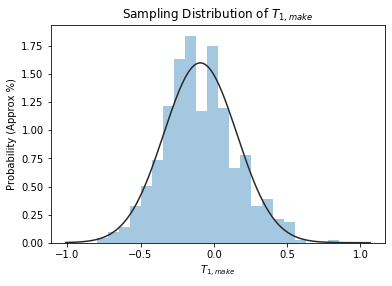

In [25]:
from scipy.stats import norm 

sns.distplot(obs_tv_stats[1], fit=norm, kde=False)
plt.title('Sampling Distribution of $T_{1, make}$')
plt.xlabel('$T_{1,make}$')
plt.ylabel('Probability (Approx %)');

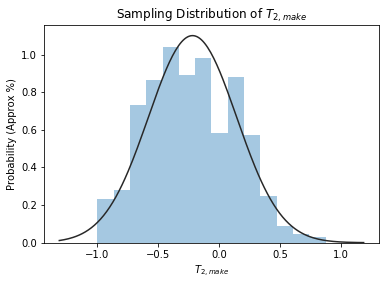

In [26]:
sns.distplot(obs_tv_stats[2], fit=norm, kde=False)
plt.title('Sampling Distribution of $T_{2, make}$')
plt.xlabel('$T_{2,make}$')
plt.ylabel('Probability (Approx %)');

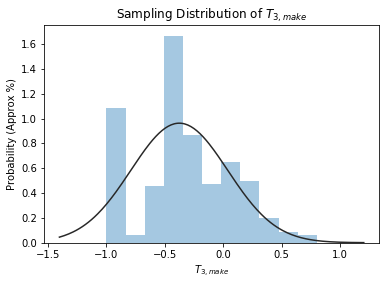

In [27]:
sns.distplot(obs_tv_stats[3], fit=norm,kde=False)
plt.title('Sampling Distribution of $T_{3, make}$')
plt.xlabel('$T_{3,make}$')
plt.ylabel('Probability (Approx %)');

In [40]:
all_data = dict_to_df(curry_data_dict)
shot_data = all_data.set_index(['game', 'player'])
curry_data = shot_data.loc[pd.IndexSlice['.json', :], 'shots']

In [41]:
#calculate simulated statistic
simulated_stat = pd.Series()
obs_tv_stats = {}
num_discarded = {}
p_vals = {}
significant = {}

#creating simulated_stat matrix
for i in np.arange(len(curry_data)):
    simulated_stat.loc[i] = ([int(curry_data[i][j]) for j in np.random.randint(len(curry_data[i]), size=10000)])

print(simulated_stat.loc[i])
for k_val in np.arange(1,4):
    obs_tv_stat = []
    p_val = []
    for game in curry_data:
        obs_tv_stat.append(calc_tk_stat(pd.Series(game), k_val))
    num_discarded[k_val] = len([i for i in obs_tv_stat if str(i)=='nan'])
    obs_tv_stat = [i for i in obs_tv_stat if str(i)!='nan']
    obs_tv_stats[k_val] = obs_tv_stat
    p_val = calc_p_values(obs_tv_stat, simulated_stat)
    p_vals[k_val] = p_val
    significant[k_val] = len([i for i in p_val if i<0.05])

[1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 

/Users/aissetorres/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/aissetorres/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


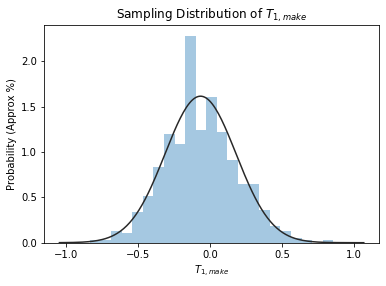

In [43]:
sns.distplot(obs_tv_stats[1], fit=norm, kde=False)
plt.title('Sampling Distribution of $T_{1, make}$')
plt.xlabel('$T_{1,make}$')
plt.ylabel('Probability (Approx %)');

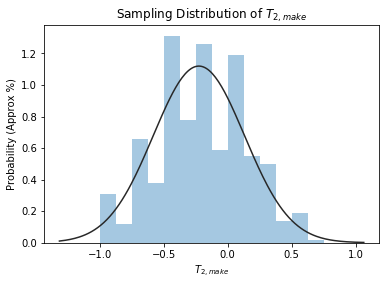

In [44]:
sns.distplot(obs_tv_stats[2], fit=norm, kde=False)
plt.title('Sampling Distribution of $T_{2, make}$')
plt.xlabel('$T_{2,make}$')
plt.ylabel('Probability (Approx %)');


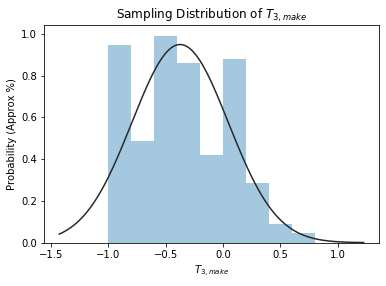

In [45]:
sns.distplot(obs_tv_stats[3], fit=norm,kde=False)
plt.title('Sampling Distribution of $T_{3, make}$')
plt.xlabel('$T_{3,make}$')
plt.ylabel('Probability (Approx %)');

In [47]:
all_data = dict_to_df(harden_data_dict)
shot_data = all_data.set_index(['game', 'player'])
harden_data = shot_data.loc[pd.IndexSlice['.json', :], 'shots']

In [48]:
#calculate simulated statistic
simulated_stat = pd.Series()
obs_tv_stats = {}
num_discarded = {}
p_vals = {}
significant = {}

#creating simulated_stat matrix
for i in np.arange(len(harden_data)):
    simulated_stat.loc[i] = ([int(harden_data[i][j]) for j in np.random.randint(len(harden_data[i]), size=10000)])

print(simulated_stat.loc[i])
for k_val in np.arange(1,4):
    obs_tv_stat = []
    p_val = []
    for game in harden_data:
        obs_tv_stat.append(calc_tk_stat(pd.Series(game), k_val))
    num_discarded[k_val] = len([i for i in obs_tv_stat if str(i)=='nan'])
    obs_tv_stat = [i for i in obs_tv_stat if str(i)!='nan']
    obs_tv_stats[k_val] = obs_tv_stat
    p_val = calc_p_values(obs_tv_stat, simulated_stat)
    p_vals[k_val] = p_val
    significant[k_val] = len([i for i in p_val if i<0.05])

[1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 

/Users/aissetorres/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/aissetorres/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


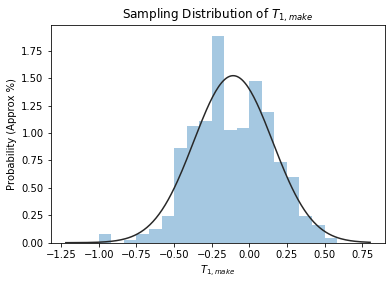

In [49]:
sns.distplot(obs_tv_stats[1], fit=norm, kde=False)
plt.title('Sampling Distribution of $T_{1, make}$')
plt.xlabel('$T_{1,make}$')
plt.ylabel('Probability (Approx %)');

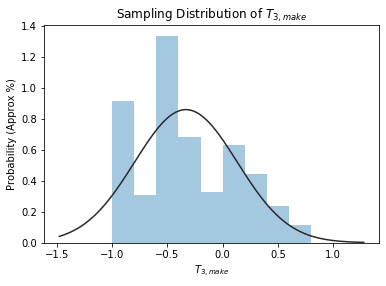

In [50]:
sns.distplot(obs_tv_stats[3], fit=norm,kde=False)
plt.title('Sampling Distribution of $T_{3, make}$')
plt.xlabel('$T_{3,make}$')
plt.ylabel('Probability (Approx %)');

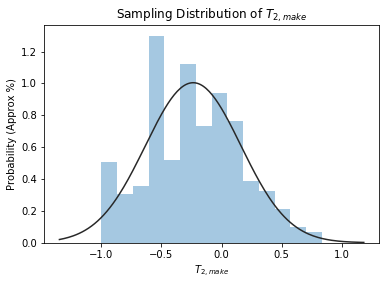

In [51]:
sns.distplot(obs_tv_stats[2], fit=norm, kde=False)
plt.title('Sampling Distribution of $T_{2, make}$')
plt.xlabel('$T_{2,make}$')
plt.ylabel('Probability (Approx %)');